In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X, y = breast_cancer.data, breast_cancer.target

print(f"Breast Cancer features: {breast_cancer.feature_names}")
print(f"Breast Cancer target: {breast_cancer.target_names}")

Breast Cancer features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Breast Cancer target: ['malignant' 'benign']


In [5]:
!pip install xgboost

     -------------------------------------- 124.9/124.9 MB 8.5 MB/s eta 0:00:00


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape of X_train: (455, 30), y_train: (455,)
Shape of X_test: (114, 30), y_test: (114,)


In [4]:
# How it works
# 1- Initialization: Starts with an initial prediction (e.g., mean value).
# 2- Building Trees: Iteratively adds decision trees to minimize the loss function.
# 3- Gradient Descent: Uses the gradients of the loss function to fit new trees, improving the model iteratively.
# 4- Boosting Process: Combines the predictions of all trees to form a strong learner, reducing bias and variance.

from xgboost import XGBClassifier, to_graphviz
from sklearn.metrics import accuracy_score, f1_score

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train.ravel())

xgb_predictions = xgb_model.predict(X_test)

print(f"XGB Accuracy: {accuracy_score(y_test, xgb_predictions):.3f}")
print(f"XGB F1-Score: {f1_score(y_test, xgb_predictions, average='weighted'):.3f}")

XGB Accuracy: 0.956
XGB F1-Score: 0.956


In [5]:
!pip install graphviz

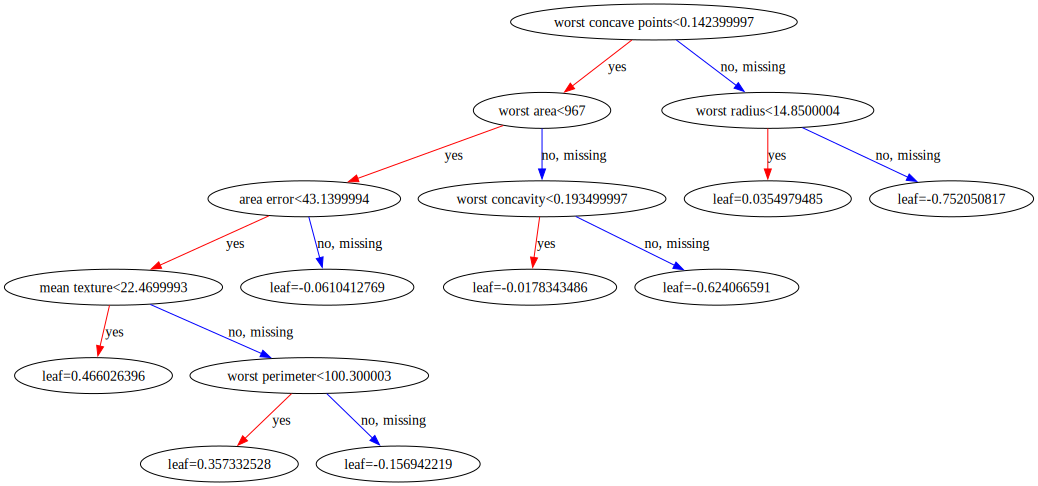

In [7]:
import os

# Add Graphviz bin directory to PATH
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

from xgboost import to_graphviz

graph = to_graphviz(xgb_model)
graph